In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten, Dense,Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
train_dir='/content/drive/MyDrive/chest_xray/train'
test_dir='/content/drive/MyDrive/chest_xray/test'
val_dir='/content/drive/MyDrive/chest_xray/val'

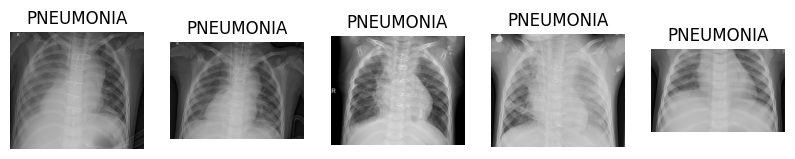

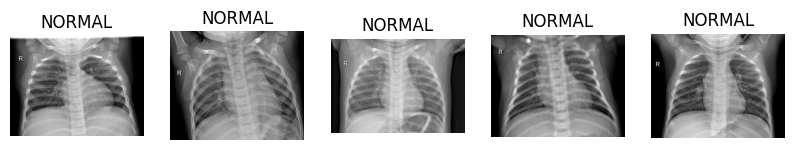

In [4]:
def preview_image(data_dir,class_name,num_images=5):
    path=os.path.join(data_dir,class_name)
    images=os.listdir(path)
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        img=cv2.imread(os.path.join(path,images[i]))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.subplot(1,num_images, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

preview_image(train_dir,'PNEUMONIA')
preview_image(train_dir,'NORMAL')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_val_datagen=ImageDataGenerator(
    rescale=1./255
    )

train_data=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

val_data=test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

test_data=test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 20 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model=Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
history=model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.6305 - val_accuracy: 0.5000 - val_loss: 0.6823
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5500 - loss: 0.6030 - val_accuracy: 0.6250 - val_loss: 0.6558
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7000 - loss: 0.6178 - val_accuracy: 0.5625 - val_loss: 0.6621
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6500 - loss: 0.5647 - val_accuracy: 0.6250 - val_loss: 0.6306
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.9500 - loss: 0.4852 - val_accuracy: 0.6250 - val_loss: 0.6320
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8500 - loss: 0.5229 - val_accuracy: 0.5625 - val_loss: 0.6260
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7000 - loss: 0.5602 - val_accuracy: 0.5000 - val_loss: 0.9700
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8000 - loss: 0.4490 - val_accuracy: 0.6250 - val_loss: 0.6536
Epoch 9/20
1/1 ━

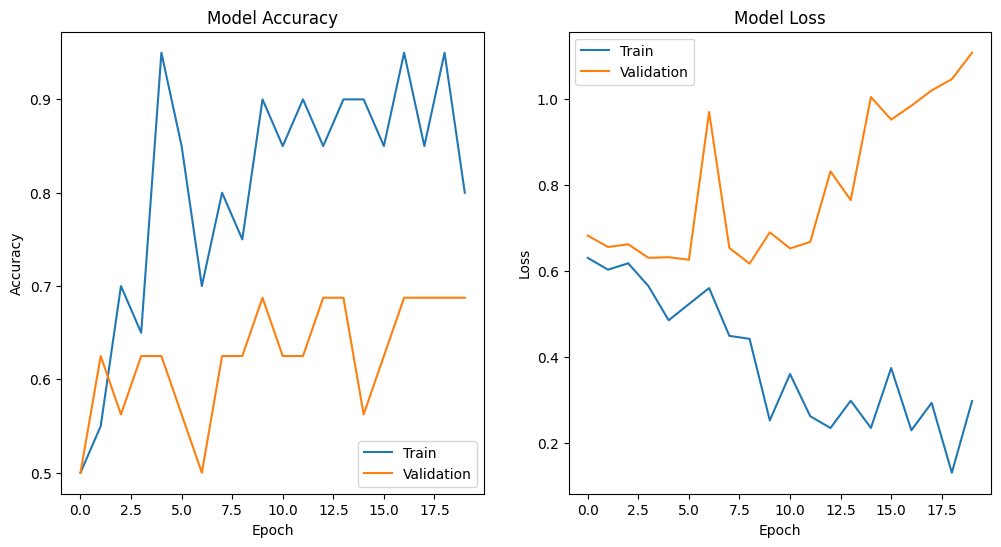

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [13]:
test_loss, test_acc=model.evaluate(test_data)
print(f"Test Accuracy: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8500 - loss: 0.6630
Test Accuracy: 0.8500000238418579


In [16]:
#Prediction

import cv2
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
  img=image.load_img(img_path,target_size=(224,224))
  img=image.img_to_array(img)

  img=np.expand_dims(img,axis=0)

  img=img/255.0

  prediction=model.predict(img)

  if prediction>0.5:
    print("The person is having Pneumonia")
  else:
    print("The person is Normal")

predict_image('/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0005-0001.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The person is Normal
